In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
## 1. Importing the csv file
df1 = pd.read_csv('Mumbai1.csv')
df1.head()

,Sr. No,Price,Area,Location,Price Rise,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,19%,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,19%,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,19%,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,19%,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,19%,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [3]:
df1.shape

(6347, 20)

In [4]:
## 2. Sanitizing the dataset, cleaning our data

df1.groupby('No. of Bedrooms')['No. of Bedrooms'].agg('count')

No. of Bedrooms
1    2307
2    2601
3    1201
4     190
5      39
6       7
7       2
Name: No. of Bedrooms, dtype: int64

In [5]:
## We will drop certain column that are not necessary for house prediction
df2 = df1.drop(['Sr. No', 'New/Resale'], axis = 1) # By default axis is 0 but at axis = 0 Key error raised
df2.head()

,Price,Area,Location,Price Rise,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,19%,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,19%,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,19%,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,19%,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,19%,1,0,1,1,1,1,0,0,1,1,0,0,0,0


In [6]:
df2.isnull().sum()

Price                   0
Area                    0
Location                0
Price Rise              0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [7]:
## For dropping null value as in our case it's not required
df3 = df2.dropna()
df3.isnull().sum()

Price                   0
Area                    0
Location                0
Price Rise              0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [8]:
## Finding Unique values
df2['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [9]:
## For creating a new column
df2['New_Column'] = df2['Old_Column'].apply(lambda x: x.split(' ')[0])

## split function will split the values of Old_Column according to space and breaking it into 2 differnt tokens,
## after that we are fetching 1st token and adding it into New_Column 
## Ex:- Old_Column :- 4 Bedrooms, 2 Bedrooms
## Thus through split 4 will came as 1 token that is index 0 and Bedroom will came as 2 token that is index 1
## Thus New_Column contains values such as 4, 2, ....

KeyError: 'Old_Column'

In [10]:
df2.columns['No. of Bedrooms'] = ['No._of_Bedrooms']
df2.head()

TypeError: Index does not support mutable operations

In [9]:
## Changing column name
df2 = df2.rename(columns = {'No. of Bedrooms':'BHK'})
df2.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,19%,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,19%,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,19%,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,19%,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,19%,1,0,1,1,1,1,0,0,1,1,0,0,0,0


In [10]:
df2[df2.BHK>5]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
962,70000000,2000,mumbai,218%,6,1,1,1,1,1,0,1,0,0,0,0,0,0
977,50000000,7000,Kalyan,-23%,6,0,0,1,1,1,0,0,0,0,0,0,0,0
1592,25000000,2500,Sea Face,0%,7,0,1,1,1,0,0,0,0,1,0,0,0,0
1600,120000000,3500,Upper Worli,-11%,7,0,1,1,1,0,0,0,0,1,0,0,0,0
1621,260000000,5642,Sion,-36%,6,1,1,1,0,1,0,1,0,1,1,1,1,1
2011,65000000,2590,Kandivali East,13%,6,1,1,1,1,1,1,1,1,1,1,1,1,1
2126,77500000,3507,Goregaon,58.20%,6,1,1,1,1,1,0,1,1,1,1,0,1,1
5378,50000000,2500,Andheri East,-16%,6,0,1,0,0,0,0,0,1,0,0,1,0,0
6279,79000000,3300,Goregaon East,49%,6,1,1,0,0,0,1,1,1,1,0,1,1,1


In [11]:
df2.Area.unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [12]:
## create the copy of entire dataset
df3 = df2.copy()
df3.head(3) # will return 3 values

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,19%,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,19%,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,19%,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [13]:
df3.loc[72] # will return 72 index value

Price                   15000000
Area                        1685
Location                Kharghar
Price Rise                   19%
BHK                            3
Gymnasium                      1
Lift Available                 1
Car Parking                    1
Maintenance Staff              1
24x7 Security                  1
Children's Play Area           1
Clubhouse                      1
Intercom                       0
Landscaped Gardens             1
Indoor Games                   1
Gas Connection                 1
Jogging Track                  1
Swimming Pool                  1
Name: 72, dtype: object

In [14]:
## First replace was not working but after adding inplace=True it's working
df3['Location'].replace('Ambivli','Ambivali',inplace=True)

In [15]:
df3[df3.Location == "Ambivali"]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
2691,20000000,1095,Ambivali,16%,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3886,2000000,640,Ambivali,0%,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df3['Location'].replace('mumbai','Mumbai',inplace=True)
df3[df3.Location == "mumbai"]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool


In [17]:
df3['Location'].replace('azad nagar','Azad Nagar',inplace=True)
df3[df3.Location == "azad nagar"]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool


In [18]:
df3['Location'].replace('dhanukarwadi','Dhanukarwadi',inplace=True)
df3[df3.Location == "dhanukarwadi"]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool


In [19]:
df3['Location'].replace('Dombivli (West)','Dombivli West',inplace=True)
df3[df3.Location == "Dombivli West"]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
1012,2300000,480,Dombivli West,-20%,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1784,3500000,590,Dombivli West,-20%,2,0,0,1,0,1,1,0,0,0,0,0,0,0
2335,4000000,540,Dombivli West,-20%,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2381,4500000,645,Dombivli West,-20%,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2458,10000000,1050,Dombivli West,-20%,2,0,1,0,0,0,1,0,0,0,0,0,0,0
2530,5500000,725,Dombivli West,-20%,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2655,2400000,350,Dombivli West,-20%,1,1,1,0,0,0,1,1,1,0,0,0,0,0
2932,7500000,1015,Dombivli West,-20%,2,0,1,0,0,0,1,0,0,0,0,0,0,0
3147,6000000,750,Dombivli West,-20%,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3677,2600000,375,Dombivli West,-20%,1,1,1,0,0,0,1,1,1,0,0,0,0,0


In [20]:
df3['Location'].replace('Four Bungalows','4 Bungalows',inplace=True)
df3['Location'].replace('Four Bunglows','4 Bungalows',inplace=True)
df3['Location'].replace('4 Bunglows','4 Bungalows',inplace=True)

In [21]:
df3[df3.Location == '4 Bungalows']

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
638,9500000,850,4 Bungalows,0%,2,1,1,1,1,1,0,0,0,0,0,0,0,0
639,7000000,450,4 Bungalows,0%,1,1,1,1,1,1,0,0,0,0,0,0,0,0
960,18000000,675,4 Bungalows,-15%,2,1,1,1,1,1,0,0,0,0,0,0,0,0
1471,25000000,1350,4 Bungalows,-15%,2,0,1,1,1,1,0,0,0,0,0,0,0,0
1918,13000000,550,4 Bungalows,0%,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [22]:
## Replacing repeating location values or changing cities name from non-standard to standard fromat

df3['Location'].replace('gokuldham','Gokuldham',inplace=True)
df3['Location'].replace('Goregaon (East)','Goregaon East',inplace=True)
df3['Location'].replace('I C Colony','IC Colony',inplace=True)
df3['Location'].replace('juhu tara','Juhu tara',inplace=True)
df3['Location'].replace('kandivali','Kandivali',inplace=True)
df3['Location'].replace('Kapur Bawdi','Kapurbawadi',inplace=True)
df3['Location'].replace('kavesar','Kavesar',inplace=True)
df3['Location'].replace('kolshet','Kolshet',inplace=True)
df3['Location'].replace('kolshet','Kolshet',inplace=True)
df3['Location'].replace('matunga east','Matunga East',inplace=True)
df3['Location'].replace('Neral','Nerul',inplace=True)
df3['Location'].replace('Nere','Nerul',inplace=True)
df3['Location'].replace('PARSIK NAGAR','Parsik Nagar',inplace=True)
df3['Location'].replace('Sector-13 Kharghar','Sector13 Kharghar',inplace=True)
df3['Location'].replace('Seven Bunglow','7 Bungalows',inplace=True)
df3['Location'].replace('Taloje','Taloja',inplace=True)
df3['Location'].replace('thakur village kandivali east','Thakur Village',inplace=True)
df3['Location'].replace('vasant vihar thane west','Vasant Vihar',inplace=True)
df3['Location'].replace('Vile Parle E','Vile Parle East',inplace=True)
df3['Location'].replace('vile parle west','Vile Parle West',inplace=True)
df3['Location'].replace('Wadala East Wadala','Wadala East',inplace=True)
df3['Location'].replace('worli sea Fase','Worli Sea Face',inplace=True)
df3['Location'].replace('worli sea face','Worli Sea Face',inplace=True)

In [23]:
## https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
# axis=0 for rows
# axis=1 for columns
#inplace=True -> alter the database directly
#inplace=False -> return the result
data_location = df3.set_index("Location")
replaced = data_location.drop(['no 9'])

In [24]:
# problem with it. !!!! pending to solve !!!!
data_location.columns

Index(['Price', 'Area', 'Price Rise', 'BHK', 'Gymnasium', 'Lift Available',
       'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [23]:
## df3.Price.unique()
df3.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,19%,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,19%,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,19%,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,19%,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,19%,1,0,1,1,1,1,0,0,1,1,0,0,0,0


In [24]:
df4 = df3.copy()
## defining a function
def convert_percent_to_float(x):
    try:
        result = float(x.strip('%'))/100
    except:
        return x
    return result

convert_percent_to_float('19%')

0.19

In [25]:
## Error :- https://stackoverflow.com/questions/35657918/series-object-has-no-attribute-strip
df4['Price Rise'].replace('52%�','52%',inplace=True)
df4['Price Rise'] = df4['Price Rise'].apply(convert_percent_to_float)
df4.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,0.19,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,0.19,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,0.19,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,0.19,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,0.19,1,0,1,1,1,1,0,0,1,1,0,0,0,0


In [26]:
df4['Price Rise'].unique()

array([ 0.19 ,  0.   ,  0.1  ,  0.24 ,  0.46 , -0.32 , -0.25 , -0.1  ,
        0.35 , -0.12 , -0.06 ,  0.05 ,  0.06 ,  0.18 ,  0.28 ,  0.07 ,
        0.04 ,  0.36 ,  0.12 ,  0.13 , -0.16 ,  0.49 ,  0.11 ,  0.44 ,
        0.63 ,  0.582,  0.81 ,  0.26 ,  0.02 ,  0.45 ,  0.95 , -0.05 ,
        0.22 ,  0.03 ,  0.32 ,  0.57 ,  1.22 ,  0.29 ,  0.2  ,  0.21 ,
        0.17 , -0.17 ,  0.31 ,  0.14 ,  0.15 ,  4.42 ,  3.09 , -0.07 ,
       -0.2  , -0.13 ,  9.96 , -0.27 , -0.26 , -0.23 , -0.31 ,  0.3  ,
        0.41 , -0.09 , -0.04 ,  0.33 ,  1.35 ,  1.58 , -0.059,  0.48 ,
        1.61 ,  0.16 ,  0.08 ,  2.18 , -0.73 ,  1.53 , -0.14 ,  0.23 ,
       -0.19 ,  0.09 ,  0.51 , -0.21 , -0.15 , -0.47 ,  0.4  ,  1.51 ,
        0.39 ,  0.43 ,  0.52 ,  0.87 ,  0.72 ,  0.25 , -0.02 ,  0.38 ,
       -0.11 ,  2.96 ,  0.97 ,  0.55 ,  0.61 ,  0.58 , -0.08 ,  0.37 ,
       -0.34 ,  1.16 , -0.36 , -0.03 , -0.18 , -0.29 , -0.3  ,  0.74 ,
        0.42 ,  0.78 ,  3.57 ,  1.01 , -0.57 ])

In [27]:
## 3. Feature Engineering and dimensionality reduction technique
df5 = df4.copy()
df5.columns

Index(['Price', 'Area', 'Location', 'Price Rise', 'BHK', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [28]:
df5['Price_per_sqft'] = df5['Price']/df5['Area']
df5.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
0,4850000,720,Kharghar,0.19,1,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,4500000,600,Kharghar,0.19,1,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,6700000,650,Kharghar,0.19,1,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,4500000,650,Kharghar,0.19,1,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,5000000,665,Kharghar,0.19,1,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


In [29]:
df5[df5['Price_per_sqft'] < 0]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft


In [30]:
len(df5.Location.unique())

400

In [31]:
## Remove the trailiing spaces
df5.Location = df5.Location.apply(lambda x: x.strip())
location_stats = df5.groupby('Location')['Location'].agg('count')
location_stats

Location
15th Road            1
4 Bungalows          5
7 Bungalows          1
Adaigaon             1
Agripada             1
                    ..
sec 50 new           1
taloja panchanand    8
ulhasnagar 4         1
vrindavan society    1
worli sea face       1
Name: Location, Length: 400, dtype: int64

In [32]:
## To get higher values first we will sort values in descending order
location_stats = df5.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
# location_stats
len(location_stats[location_stats<2])

167

In [33]:
## All locations which contains only 1 record will be considered into other location
location_equal_one = location_stats[location_stats<2]
df5.Location = df5.Location.apply(lambda x: 'other' if x in location_equal_one else x)
len(df5.Location.unique())

234

In [34]:
df5[df5.Location == 'other']

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
187,65000000,1200,other,-0.25,2,0,1,0,0,0,0,0,0,0,0,0,0,0,54166.666667
260,5500000,400,other,0.95,1,0,1,1,0,1,0,0,0,1,0,0,0,0,13750.000000
272,9200000,400,other,0.06,1,1,1,1,1,1,0,0,0,0,0,0,0,0,23000.000000
275,34100000,1500,other,0.00,3,1,1,1,1,1,0,0,0,0,0,0,0,0,22733.333333
291,9000000,1260,other,0.00,2,1,1,1,1,1,0,0,0,0,0,0,0,0,7142.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5439,2900000,570,other,0.04,1,0,0,0,0,0,1,0,0,0,0,0,0,0,5087.719298
5922,2600000,385,other,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6753.246753
5968,4699000,710,other,0.24,1,0,1,0,0,0,1,0,0,0,0,0,0,0,6618.309859
6045,4500000,325,other,-0.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13846.153846


In [35]:
## Outlier Detection and removal
## What is Outlier ?
## ANS.) The datapoints which are data errors, or such data points which are not error but in future can create some errors

## We can use standard deviation or simple domain Knowledge
## df5[(df5.Area/df5.BHK)<200] ----->> Thus in our case there are no such datapoints

In [36]:
df5.shape

(6347, 19)

In [37]:
## There are 9 Duplicate records but after dropping records from below cell we can see that there are no duplicate records
len(df5[df5.duplicated()])

9

In [38]:
## Removing Duplicates
# Syntax: DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)
# Parameters: 
# subset: Subset takes a column or list of column label. It’s default value is none. After passing columns, it will consider them only for duplicates. 
# keep: keep is to control how to consider duplicate value. It has only three distinct value and default is ‘first’. 
 

# If ‘first’, it considers first value as unique and rest of the same values as duplicate.
# If ‘last’, it considers last value as unique and rest of the same values as duplicate.
# If False, it consider all of the same values as duplicates
# inplace: Boolean values, removes rows with duplicates if True.
# Return type: DataFrame with removed duplicate rows depending on Arguments passed. 
    
df5.drop_duplicates(inplace=True)

In [39]:
## after removing duplicates, there are no duplicates...
len(df5[df5.duplicated()])

0

In [40]:
df5[df5.duplicated()]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft


In [41]:
## decribe() -> it gives you some statistics on that particular column
df5.Price_per_sqft.describe()

count      6338.000000
mean      13563.976665
std        9577.014178
min        1597.444089
25%        7236.659488
50%       10508.419812
75%       17142.857143
max      109950.522265
Name: Price_per_sqft, dtype: float64

In [42]:
# df5[df5.Price_per_sqft > 100000]
df5[df5.Price_per_sqft > 9577]

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
2,6700000,650,Kharghar,0.19,1,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
12,11000000,1060,Kharghar,0.19,2,1,1,1,1,1,1,1,1,1,0,0,0,1,10377.358491
13,10500000,1095,Kharghar,0.19,2,1,1,1,1,1,1,1,1,1,1,0,0,1,9589.041096
23,28000000,2470,Kharghar,0.19,4,1,1,1,1,1,1,1,1,1,1,1,1,1,11336.032389
24,40000000,2100,Kharghar,0.19,4,0,1,1,1,1,0,0,1,0,0,0,0,0,19047.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,38500000,985,Ville Parle West,3.57,3,0,1,0,0,0,0,0,0,0,0,0,0,0,39086.294416
6334,38500000,985,Ville Parle West,3.57,3,0,1,0,0,0,0,0,0,0,0,1,0,0,39086.294416
6335,25000000,1250,Borivali West,0.12,3,0,0,0,0,0,0,0,0,0,0,0,0,0,20000.000000
6343,14500000,900,Thane West,0.20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,16111.111111


In [43]:
## Below 2 records are same except little difference, thus want to deal with that.....
# 6343	14500000	900	Thane West	0.20	2	0	0	0	0	0	0	0	0	0	0	0	0	0	16111.111111
# 6344	14500000	900	Thane West	0.20	2	0	1	0	0	0	0	0	1	0	0	1	0	0	16111.111111

In [44]:
## Outlier Detection -----
## As we are creating a generic module so all the values which are extreme high or extreme low, we will remove that values
## using the concept of mean and standard deviation.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):       
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
## m+st = 23,140.990843/sqft  and m-st = 3,986.962487/sqft
## Thus we are removing values which are greater than m+st and less than m-st, so that our dataset best suits for the 
## generic prediction Model.
df6.shape

(4762, 19)

In [45]:
print("Deleting " +str(6338-4762)+" records to make our dataset appropriate")

Deleting 1576 records to make our dataset appropriate


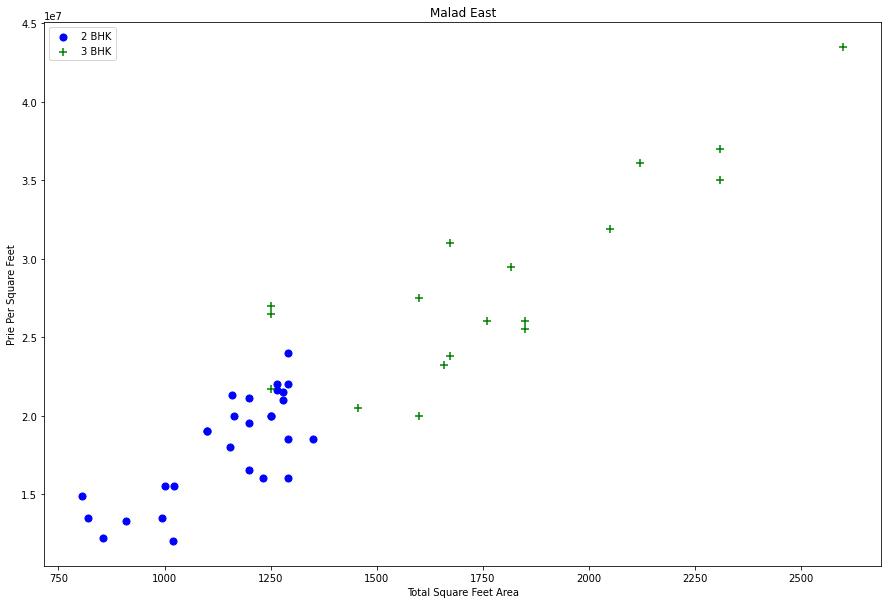

In [46]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.Location==location) & (df.BHK==2)]
    BHK3 = df[(df.Location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.Area,BHK2.Price,color='blue',label='2 BHK',s=50)
    plt.scatter(BHK3.Area,BHK3.Price,marker='+', color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Prie Per Square Feet")
    plt.title(location)
    plt.legend()
    
## Above function takes location and dataframe as input
plot_scatter_chart(df6,"Malad East")

In [47]:
## First we will perform group by and on the basis of each location we are creating a new dataframes based on BHK, and per
# BHK we are computing mean, std and count. Thus we are trying to exclude those values whose price_per_sqft is less than mean
# of previous BHK.
## If 2 BHK value is less than mean of 1 BHK then we will exclude that
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(3657, 19)

In [48]:
print("There were " +str(4762-3657)+" records where Succeeding BHK value was less than preceeding BHK mean value ex:- 2 BHK value was less than 1 BHK mean value, thus we have excluded that")

There were 1105 records where Succeeding BHK value was less than preceeding BHK mean value ex:- 2 BHK value was less than 1 BHK mean value, thus we have excluded that


In [49]:
df2.shape

(6347, 18)

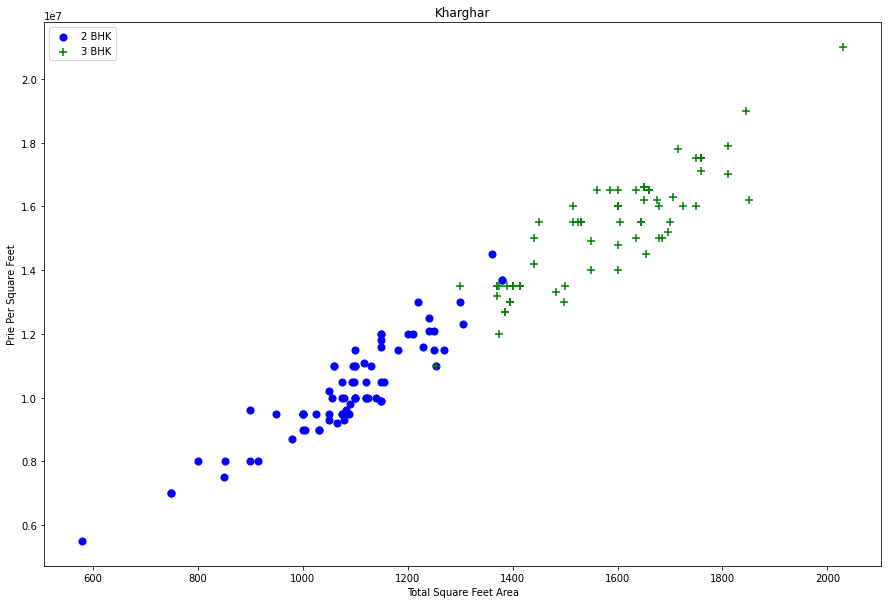

In [50]:
## We will again plot the same scatter plot to see the changes
plot_scatter_chart(df7,"Kharghar")

Text(0, 0.5, 'Count')

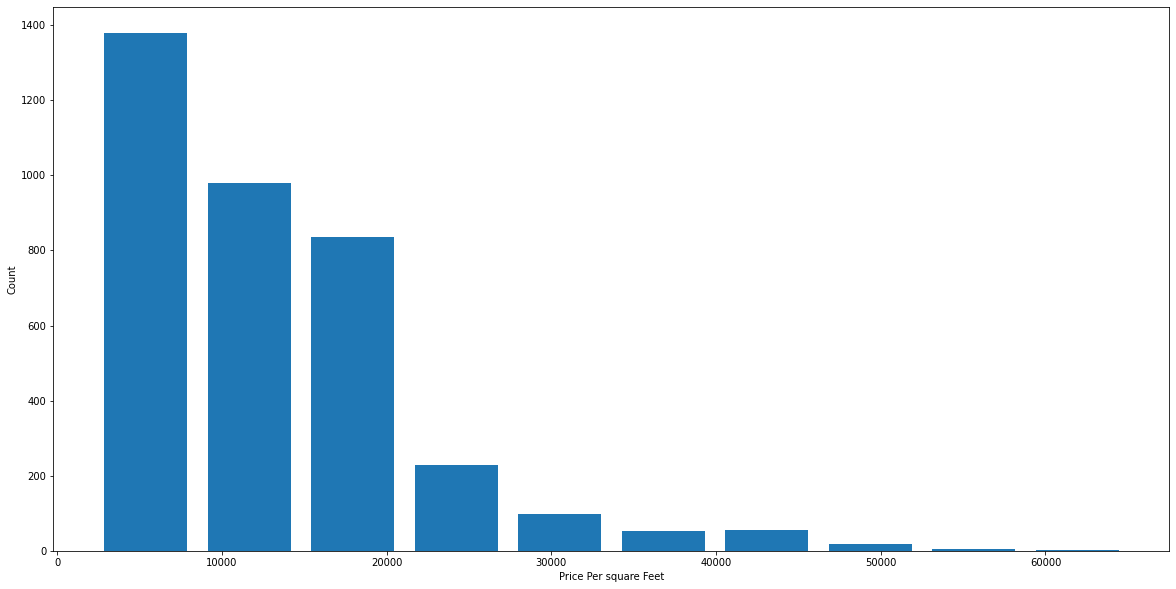

In [51]:
## Plotting histogram to see which sq ft contains majority of records
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per square Feet")
plt.ylabel("Count")

In [52]:
df7.columns

Index(['Price', 'Area', 'Location', 'Price Rise', 'BHK', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
       'Price_per_sqft'],
      dtype='object')

In [53]:
df7['Price Rise'].describe()

## Minimum value = -0.73
## Maximum value = 9.96
## Thus Price Rise is in range of -0.73 to 9.96

count    3657.000000
mean        0.231868
std         0.425951
min        -0.730000
25%         0.060000
50%         0.190000
75%         0.360000
max         9.960000
Name: Price Rise, dtype: float64

In [54]:
df7.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
0,7000000,450,4 Bungalows,0.00,1,1,1,1,1,1,0,0,0,0,0,0,0,0,15555.555556
1,25000000,1350,4 Bungalows,-0.15,2,0,1,1,1,1,0,0,0,0,0,0,0,0,18518.518519
2,13000000,550,4 Bungalows,0.00,1,0,0,1,0,1,0,0,0,0,0,0,0,0,23636.363636
3,6200000,400,Airoli,0.40,1,0,1,1,1,1,0,0,0,0,0,0,0,0,15500.000000
5,14900000,1245,Airoli,0.40,2,0,1,1,0,0,0,0,0,0,0,1,0,0,11967.871486


In [55]:
df8 = df7.drop(['Price_per_sqft'], axis='columns')
df8.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,7000000,450,4 Bungalows,0.00,1,1,1,1,1,1,0,0,0,0,0,0,0,0
1,25000000,1350,4 Bungalows,-0.15,2,0,1,1,1,1,0,0,0,0,0,0,0,0
2,13000000,550,4 Bungalows,0.00,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,6200000,400,Airoli,0.40,1,0,1,1,1,1,0,0,0,0,0,0,0,0
5,14900000,1245,Airoli,0.40,2,0,1,1,0,0,0,0,0,0,0,1,0,0


In [56]:
## Now we will build a machine elarning modeland then use k-fold cross-validation and grid search cv to come up with the best 
# algorithm as well as the best parameters

## machine learning column cannot interpret text column thus we have to convert text into numeric column and one of the ways 
# of converting text column which is a categorical information into numerical information is to use one hot encoding also called
# dummies.

## Thus when we run it, we will get separte column for separate location...
## What is get_dummies() function ?

dummies = pd.get_dummies(df8.Location)
dummies.head()

,4 Bungalows,Airoli,Almeida Park,Ambarnath,Ambernath East,Ambernath West,Ambivali,Andheri,Andheri East,Andheri West,...,Virar West,Wadala,Wadala East,Worli,Worli South Mumbai,Yari Road,other,raheja vihar,roadpali navimumbai,taloja panchanand
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
## as there are 231 unique columns, so dataset is converted into 231 columns of location
len(df8.Location.unique())

231

In [58]:
## Combining df8 and dummies dataset and dropping others column from dummies dataset
df9 = pd.concat([df8,dummies.drop('other', axis='columns')], axis='columns')
df9.head()

,Price,Area,Location,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,...,Virar East,Virar West,Wadala,Wadala East,Worli,Worli South Mumbai,Yari Road,raheja vihar,roadpali navimumbai,taloja panchanand
0,7000000,450,4 Bungalows,0.00,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,25000000,1350,4 Bungalows,-0.15,2,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,13000000,550,4 Bungalows,0.00,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6200000,400,Airoli,0.40,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,14900000,1245,Airoli,0.40,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df10 = df9.drop('Location', axis=1) # thus axis=1 and axis='columns are similar'
df10.head()

,Price,Area,Price Rise,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Virar East,Virar West,Wadala,Wadala East,Worli,Worli South Mumbai,Yari Road,raheja vihar,roadpali navimumbai,taloja panchanand
0,7000000,450,0.00,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,25000000,1350,-0.15,2,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,13000000,550,0.00,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6200000,400,0.40,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,14900000,1245,0.40,2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
## Now we are ready to train our Model
df10.shape

(3657, 247)

In [63]:
## Thus Now we will create X variable which will contain all independent columns that is used to train our AI model, and 
# thus price and price rise are dependent column as we are going to predict the price based on the other features...

X = df10.drop(['Price','Price Rise'], axis=1)
X.head()

,Area,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,...,Virar East,Virar West,Wadala,Wadala East,Worli,Worli South Mumbai,Yari Road,raheja vihar,roadpali navimumbai,taloja panchanand
0,450,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1350,2,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,550,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,400,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1245,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
y = pd.DataFrame()
y['Price'] = df10.Price
y['Price Rise'] = df10['Price Rise']
y.head()

# y = df10['Price Rise']
# y

,Price,Price Rise
0,7000000,0.00
1,25000000,-0.15
2,13000000,0.00
3,6200000,0.40
5,14900000,0.40


In [111]:
# y.isnull().sum()
## Error !!!!!!!!!!!!!!
y.fillna(0)

,Price,Price Rise
0,7000000,0.00
1,25000000,-0.15
2,13000000,0.00
3,6200000,0.40
5,14900000,0.40
...,...,...
4757,5800000,-0.16
4758,5800000,-0.16
4759,3500000,-0.16
4760,3500000,-0.16


In [93]:
# y.columns

In [112]:
## Thus we divide our dataset to training and test dataset, for training we use training dataset and to evaluate performance we use evaluate dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [115]:
## Thus we are using Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train) # this is going to make our model learn
lr_clf.score(X_test,y_test) # this is going to score our model that how good our model is etc..

0.9238234861749695

In [85]:
# lr_clf.predict(X_test)

In [71]:
## Error in this :-

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# n_splits shows that we have to divide our dataset into 5 folds, 

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-2.98944196e+13,  9.13988373e-01,  8.16560348e-01, -6.80819999e+12,
       -3.43022424e+15])

In [167]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }     
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
            gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X,y)
            scores.append(
            {
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
            
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,-1.047432e+14,{'normalize': False}
1,lasso,-2.271056e-03,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,8.763965e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [72]:
def predict_price(location,sqft,bhk,*argv):
    loc_index = np.where(X.columns==location)[0][0]
        
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
#     i = 2
#     for args in argv:
#         x[i] = X[args][loc_index]
#         i = i+1
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [132]:
loc_index = np.where(X.columns=='Malad East')[0][0]
X["Gymnasium"][loc_index]

####### Error coming

# loc_index = np.where(X.columns=='others')[0][0]
# X["Gymnasium"][loc_index]

#First ---

# ---------------------------------------------------------------------------
# IndexError                                Traceback (most recent call last)
# <ipython-input-130-710eddec76be> in <module>
# ----> 1 loc_index = np.where(X.columns=='others')[0][0]
#       2 X["Gymnasium"][loc_index]

# IndexError: index 0 is out of bounds for axis 0 with size 0

#Second ---
# loc_index = np.where(X.columns=='others')[0][0]
# X["Gymnasium"][loc_index]

# ---------------------------------------------------------------------------
# KeyError                                  Traceback (most recent call last)
# c:\users\burhanuddin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py in get_loc(self, key, method, tolerance)
#    3079             try:
# -> 3080                 return self._engine.get_loc(casted_key)
#    3081             except KeyError as err:

# pandas\_libs\index.pyx in pandas._libs.index.IndexEngine.get_loc()

# pandas\_libs\index.pyx in pandas._libs.index.IndexEngine.get_loc()

# pandas\_libs\hashtable_class_helper.pxi in pandas._libs.hashtable.Int64HashTable.get_item()

# pandas\_libs\hashtable_class_helper.pxi in pandas._libs.hashtable.Int64HashTable.get_item()

# KeyError: 235

# The above exception was the direct cause of the following exception:

# KeyError                                  Traceback (most recent call last)
# <ipython-input-131-bf0aecdcde09> in <module>
#       1 loc_index = np.where(X.columns=='Virar East')[0][0]
# ----> 2 X["Gymnasium"][loc_index]
#       3 
#       4 ####### Error coming
#       5 

# c:\users\burhanuddin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py in __getitem__(self, key)
#     851 
#     852         elif key_is_scalar:
# --> 853             return self._get_value(key)
#     854 
#     855         if is_hashable(key):

# c:\users\burhanuddin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py in _get_value(self, label, takeable)
#     959 
#     960         # Similar to Index.get_value, but we do not fall back to positional
# --> 961         loc = self.index.get_loc(label)
#     962         return self.index._get_values_for_loc(self, loc, label)
#     963 

# c:\users\burhanuddin\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py in get_loc(self, key, method, tolerance)
#    3080                 return self._engine.get_loc(casted_key)
#    3081             except KeyError as err:
# -> 3082                 raise KeyError(key) from err
#    3083 
#    3084         if tolerance is not None:

# KeyError: 235

0

In [78]:
## other is not present in the model
X['other']

KeyError: 'other'

In [90]:
location = ['Malad East', 'Kharghar', 'Dombivali East', 'Goregaon East', 'Nalasopara East', 'Bhiwandi']
price = []
for i in location:
    price.append(predict_price(i, 1200, 3))

c = 0
year = int(input("Enter the year to predict the house:\n"))
for i in price:
    p = np.round(i[0], decimals=3)
    p_r = np.round(i[1], decimals=3)
    print("Price of %s is %f: "%(location[c], p))
    print("Price Rise of %s is %f: "%(location[c], p_r))
    for y in range(year):
        p = p + p*p_r
    print("Price of %s after %d year will be %f: "%(location[c], year, p))
    c = c+1

Enter the year to predict the house:
5
Price of Malad East is 18319568.705000: 
Price Rise of Malad East is -0.066000: 
Price of Malad East after 5 year will be 13021158.520602: 
Price of Kharghar is 12096825.116000: 
Price Rise of Kharghar is 0.182000: 
Price of Kharghar after 5 year will be 27909932.414260: 
Price of Dombivali East is 14083313.477000: 
Price Rise of Dombivali East is -0.151000: 
Price of Dombivali East after 5 year will be 6212169.506526: 
Price of Goregaon East is 24212733.761000: 
Price Rise of Goregaon East is 0.480000: 
Price of Goregaon East after 5 year will be 171930293.122584: 
Price of Nalasopara East is 9677974.129000: 
Price Rise of Nalasopara East is 0.062000: 
Price of Nalasopara East after 5 year will be 13073956.647988: 
Price of Bhiwandi is 9572339.838000: 
Price Rise of Bhiwandi is 1.338000: 
Price of Bhiwandi after 5 year will be 668714349.752782: 


In [87]:
y_pred = lr_clf.predict(X_test)
accuracy = (lr_clf.score(X_test, y_test))
percent = np.multiply(accuracy, 100)
print('Accuracy : %f'%percent)

Accuracy : 92.382349


In [98]:
## Perform outlier detection  --- Error in this
# plt.scatter(X_rain, y_train)
# plt.plot(X_train, y_pred)
# plt.show

In [95]:
X_train.shape

(2925, 245)

In [96]:
y_train.shape

(2925, 2)

In [117]:
import pickle
with open('mumbai_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [118]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))